In [9]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../")
from utils import load_data, StrokeParams, FetalHealthParams

RANDOM_STATE = 666


def add_gaussian_noise(dataframe, sigma=0.1):
    noise = np.random.normal(0, sigma, dataframe.shape)
    noisy_df = dataframe + noise
    return noisy_df


def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.title("Data Spread and Outliers")
    plt.show()


def calculate_snr(signal, noisy_signal):
    signal_power = np.mean(signal**2)
    noise_power = np.mean((noisy_signal - signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr


def smooth_data(dataframe, window_size=3):
    return dataframe.rolling(window=window_size, min_periods=1).mean()


def visualize_data_comparison(
    original_df, noisy_df, smoothed_df, name, save_fig: bool = False
):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Original data
    axs[0].boxplot(original_df)
    axs[0].set_title("Ground Truth Data", fontsize=16)
    axs[0].set_xticklabels([])  # Remove x-axis labels
    axs[0].set_xlabel("Features", fontsize=14)

    # Noisy data
    axs[1].boxplot(noisy_df)
    axs[1].set_title("Data with Noise", fontsize=16)
    axs[1].set_xticklabels([])  # Remove x-axis labels
    axs[1].set_xlabel("Noisy Features", fontsize=14)

    # Smoothed data
    axs[2].boxplot(smoothed_df)
    axs[2].set_title("Smoothed Data", fontsize=16)
    axs[2].set_xticklabels([])  # Remove x-axis labels
    axs[2].set_xlabel("Smoothed Features", fontsize=14)

    # plt.tight_layout()
    plt.suptitle(f'{name.replace("_", " ").title()} Dataset Noisiness', fontsize=24)

    if save_fig:
        plt.savefig(f"{name}_noisy_data.png")

    plt.show()


if __name__ == "__main__":
    # load data
    strokeX, strokeY = load_data(StrokeParams.data_train, StrokeParams.target_column)
    strokeX.drop(columns=StrokeParams.cat_cols, inplace=True)
    fetalX, fetalY = load_data(FetalHealthParams.data_train, FetalHealthParams.target_column)
    fetalX.drop(columns=FetalHealthParams.cat_cols, inplace=True)

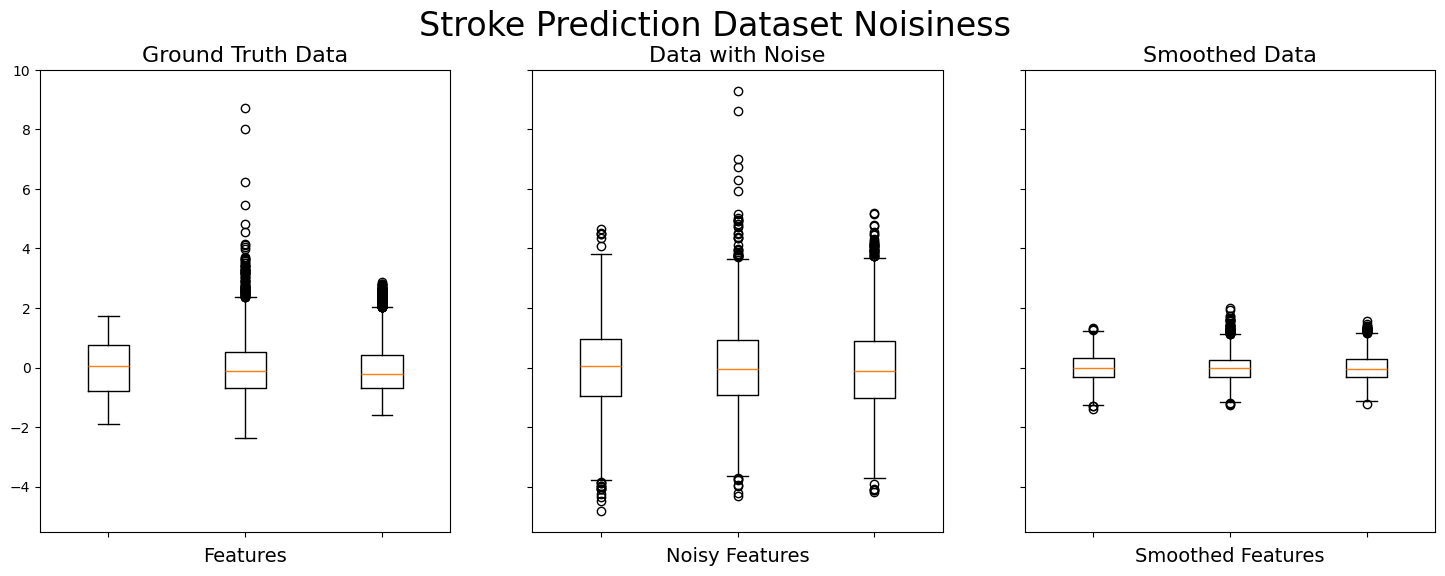

In [10]:
if __name__ == "__main__":
    strokeX_noisy = add_gaussian_noise(strokeX, sigma=1.0)
    strokeX_smoothed = smooth_data(strokeX, window_size=5)
    visualize_data_comparison(
        strokeX, strokeX_noisy, strokeX_smoothed, "stroke_prediction", save_fig=True
    )
    strokeX_noisy.to_csv("strokeX_noisy.csv", index=False)
    strokeX_smoothed.to_csv("strokeX_smoothed.csv", index=False)

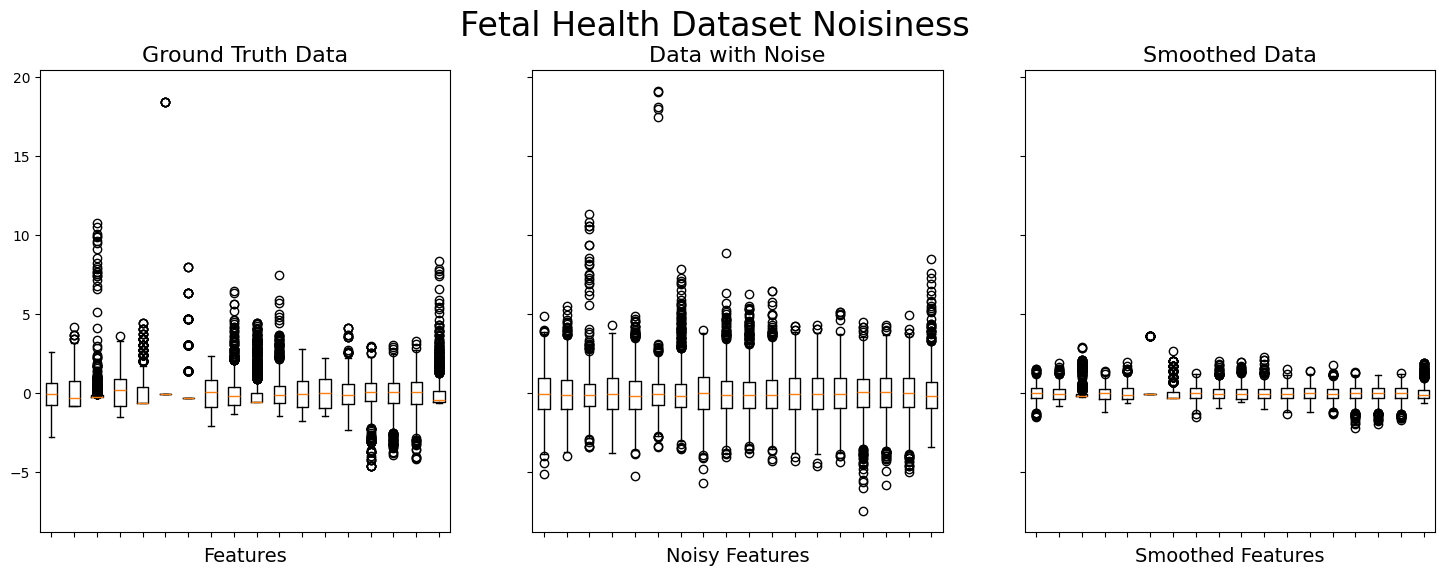

In [11]:
if __name__ == "__main__":
    fetalX_noisy = add_gaussian_noise(fetalX, sigma=1.0)
    fetalX_smoothed = smooth_data(fetalX, window_size=5)
    visualize_data_comparison(
        fetalX, fetalX_noisy, fetalX_smoothed, "fetal_health", save_fig=True
    )
    fetalX_noisy.to_csv("fetal_health_noisy.csv", index=False)
    fetalX_smoothed.to_csv("fetal_health_smoothed.csv", index=False)